In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp
%matplotlib inline

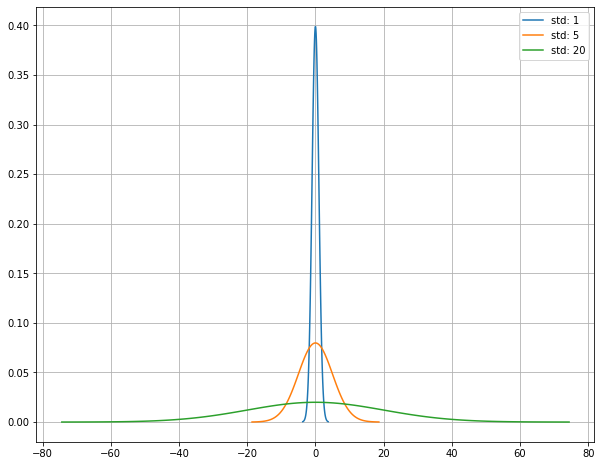

In [7]:
# Normal
std=[1,5,20]
plt.figure(figsize=(10,8))
for e in std:
    rv=norm(scale=e, loc=0)
    x=np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
    y=rv.pdf(x)
    plt.plot(x, y, label='std: {}'.format(e))
plt.legend()
plt.grid()
plt.show()

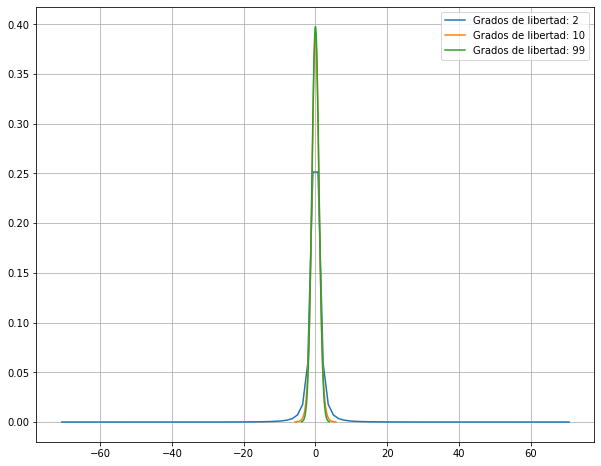

In [8]:
# t-Student
dof=[2,10,99]
plt.figure(figsize=(10,8))
for e in dof:
    rv=t(df=e, loc=0, scale=1)
    x=np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
    y=rv.pdf(x)
    plt.plot(x, y, label='Grados de libertad: {}'.format(e))
plt.legend()
plt.grid()
plt.show()

In [9]:
# Ejemplo:

# H0: mu>=5.7 , H1: mu<5.7 , x_media=5.1, s=1.6, n=100 ==> t-test (one-side) dof=99

In [10]:
mu=5.7
mu_hat=5.1
std_hat=1.6
n=100

In [11]:
t_test=(mu_hat-mu)/(std_hat/np.sqrt(n))
t_test

-3.750000000000003

In [12]:
rv=t(df=99)
p_value=rv.cdf(t_test)
p_value   # Se rechaza H0

0.0001489332089038242

In [13]:
?ttest_1samp

In [18]:
pacientes=np.random.normal(5.1, 1.6, 100)
test=ttest_1samp(pacientes, 5.7)
print (test.statistic)
print (test.pvalue/2)  # Se rechaza H0

-3.6394508497572704
0.000218212528555203


In [19]:
# otro ejemplo (altura)

# H0: mu<=1.7 , H1: mu>1.7 , x_media=1.72, s=0.2, n=100 ==> t-test (one-side) dof=99

In [20]:
t_test=(1.72-1.7)/(0.2/np.sqrt(100))
rv=t(df=99)
p_value=(1-rv.cdf(t_test))/2
p_value

0.07993711853482532

In [25]:
altura=np.random.normal(1.72, 0.2, 100)
test=ttest_1samp(altura, 1.7)
test.pvalue/2

0.03946090773783672

In [27]:
# z-test
# https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

from statsmodels.stats import weightstats as w
z_score, p_value=w.ztest(altura, value=1.7)
print (z_score, p_value)

1.775297846976857 0.0758487207285852


In [28]:
# 2 sample Htest
# Dependientes (matched pairs)

# H0: media=0

In [29]:
from scipy.stats import ttest_rel, ttest_ind

In [30]:
b_pres=pd.read_csv('data/blood_pressure 2.csv')
b_pres.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


In [31]:
ttest_rel(b_pres.after, b_pres.before)  # se rechaza H0

Ttest_relResult(statistic=-27.291841767560236, pvalue=7.303035069608042e-48)

In [32]:
ttest_1samp(b_pres.after-b_pres.before, 0)

Ttest_1sampResult(statistic=-27.291841767560236, pvalue=7.303035069608042e-48)

In [33]:
# Independientes

# H0: mu1=mu2   (two side)

ab_test=pd.read_csv('data/ab_test.csv')
ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [34]:
ttest_ind(ab_test.a, ab_test.b)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

In [35]:
ttest_ind(ab_test.a, ab_test.a)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [37]:
ttest_ind(ab_test.a, ab_test.b, equal_var=False)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009776243024828825)

In [38]:
ttest_rel(ab_test.a, ab_test.b)  # se rechaza H0

Ttest_relResult(statistic=-2.412432550488744, pvalue=0.01963507297839904)

In [39]:
# z-test 2 samples

z_score, p_value=w.ztest(ab_test.a, ab_test.b, value=0, alternative='two-sided')
print (z_score, p_value)

-2.637533181209767 0.008351145504323936
